In [1]:
import os

In [2]:
f = os.path.expanduser("~/Downloads/clinic/raw-data/Mosquitoes/Waveform Library Files/AC 6/CxT hand 30Aug2021 no2.WDQ")

In [3]:
! [ -d /media/lillian/28EC-268F/ ] && cp '{f}' /media/lillian/28EC-268F/

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pushd ../../GUI

/home/lillian/projects/hmc-courses/s7/USDA-Auburn/GUI


['~/projects/hmc-courses/s7/USDA-Auburn/Exploration/Lillian']

In [6]:
import windaq

In [33]:
#need to stay here for autoreload to work
# popd

In [8]:
w = windaq.windaq(f)

------------
mOffset: 0x0009c034
event marker pointer: 0
event marker offset: 1156
event marker index: 0
marker flag: 0b11
rel_timestamp: 0
marker_timestamp: 2021-08-30 11:21:47
BUFFER: 639036, 639552
------------
mOffset: 0x0009c03c
event marker pointer: -368
event marker offset: 7044
event marker index: 368
marker flag: 0b11
BUFFER: 639040, 639552
event marker comment pointer: -2147483500
event marker comment pointer masked: 148
event marker comment offset: 639288
comment: 3f3a 10^6, 250mV AC 100x m2
------------
mOffset: 0x0009c044
event marker pointer: -3734
event marker offset: 60900
event marker index: 3734
marker flag: 0b11
BUFFER: 639048, 639552
event marker comment pointer: -2147483472
event marker comment pointer masked: 176
event marker comment offset: 639316
comment: preprobing, 
------------
mOffset: 0x0009c04c
event marker pointer: -5127
event marker offset: 83188
event marker index: 5127
marker flag: 0b11
BUFFER: 639056, 639552
event marker comment pointer: -2147483459
e

In [9]:
w._fcontents[639288:]

b'3f3a 10^6, 250mV AC 100x m2\x00preprobing, \x00host feeling sensation probing\x00front left leg giving high 5\x00host feels pain\x00increased gain to 250X\x00shallow probe\x00head still foot down\x00abdomen swelling\x00abdomen bulging\x00mosquito gettinglarge\x00stoppef feeding\x00stopped recording\x00'

In [10]:
w._fcontents[639316:]

b'preprobing, \x00host feeling sensation probing\x00front left leg giving high 5\x00host feels pain\x00increased gain to 250X\x00shallow probe\x00head still foot down\x00abdomen swelling\x00abdomen bulging\x00mosquito gettinglarge\x00stoppef feeding\x00stopped recording\x00'

In [11]:
w._fcontents[639288:].split(b'\x00')[0].decode()

'3f3a 10^6, 250mV AC 100x m2'

In [12]:
# TODO: Make sure we get to all comments as seen in the hexdump

In [13]:
w._HiRes

0

In [14]:
n = w.nChannels
n

8

In [15]:
data = w.npdata.reshape((len(w.npdata)//n, n))
data

array([[ -5813,  18652,     -4, ...,     -8,      0,     -8],
       [ -5824,  18652,     -8, ...,     -8,      0,     -4],
       [ -5820,  18652,     -4, ...,      0,     -4,      0],
       ...,
       [-16352,   8304,     -4, ...,     -4,     -8,      0],
       [-16320,   8308,     -4, ...,     -4,     -4,      0],
       [-16312,   8304,      0, ...,      0,      0,     -4]],
      shape=(39867, 8), dtype=int16)

In [16]:
np.where(data & 0b11 == 0b00)

(array([    0,     0,     0, ..., 39866, 39866, 39866], shape=(318922,)),
 array([1, 2, 3, ..., 5, 6, 7], shape=(318922,)))

In [17]:
np.where(data & 0b11 == 0b01)

(array([], dtype=int64), array([], dtype=int64))

In [18]:
np.where(data & 0b11 == 0b10)

(array([], dtype=int64), array([], dtype=int64))

In [19]:
np.where(data & 0b11 == 0b11)

(array([    0,   368,  3734,  5127,  6271,  6933, 14385, 16608, 21357,
        24997, 26875, 29816, 37298, 38776]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

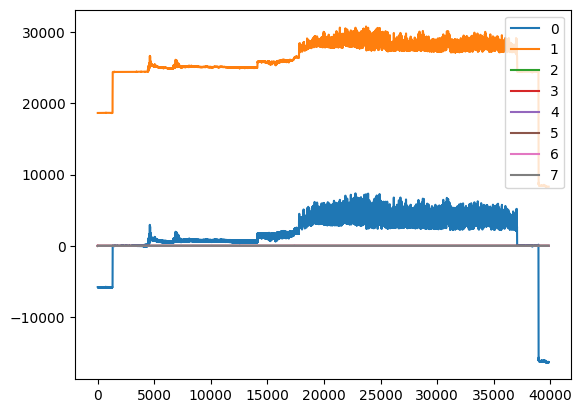

In [20]:
%matplotlib inline
for i in range(n):
    plt.plot(data[:,i], label=f'{i}')
plt.legend()

In [21]:
w.eventmarkers

[{'index': 0, 'timestamp': '2021-08-30 11:21:47'},
 {'index': 368, 'comment': '3f3a 10^6, 250mV AC 100x m2'},
 {'index': 3734, 'comment': 'preprobing, '},
 {'index': 5127, 'comment': 'host feeling sensation probing'},
 {'index': 6271, 'comment': 'front left leg giving high 5'},
 {'index': 6933, 'comment': 'host feels pain'},
 {'index': 14385, 'comment': 'increased gain to 250X'},
 {'index': 16608, 'comment': 'shallow probe'},
 {'index': 21357, 'comment': 'head still foot down'},
 {'index': 24997, 'comment': 'abdomen swelling'},
 {'index': 26875, 'comment': 'abdomen bulging'},
 {'index': 29816, 'comment': 'mosquito gettinglarge'},
 {'index': 37298, 'comment': 'stoppef feeding'},
 {'index': 38776, 'comment': 'stopped recording'}]

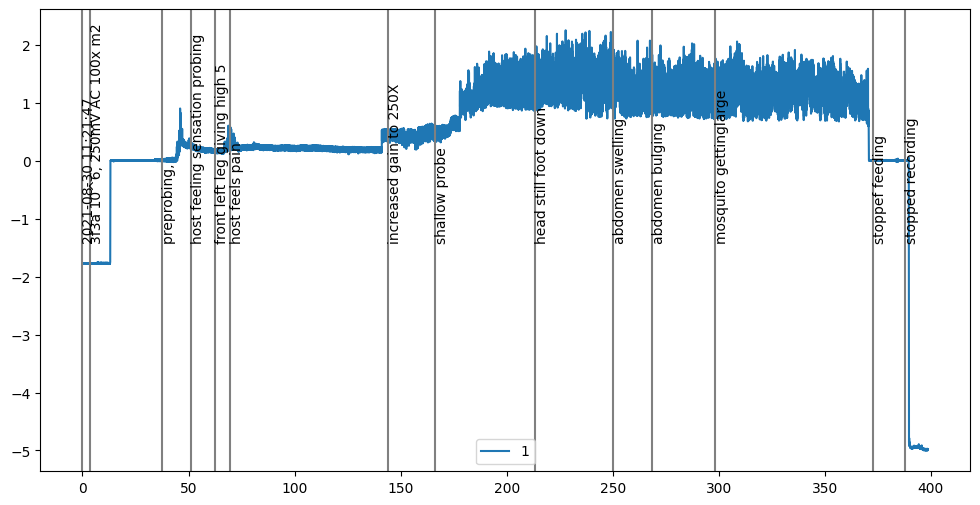

In [22]:
#%matplotlib qt
%matplotlib inline
plt.figure(figsize=(12,6))
time = w.time()
plt.plot(time, w.data(1), label='1')
#plt.plot(time, w.data(2), label='2')
for marker in w.eventmarkers:
    y = np.mean(plt.ylim())
    t = time[marker['index']]
    plt.axvline(t, color='gray')
    text = marker.get('comment', marker.get('timestamp', ''))
    plt.text(t, y, text, rotation=90)
plt.legend()

In [23]:
w._annotations

['CxT pre1',
 'CxT post1',
 'SCA, 100 mV, AC pre2',
 'SCA, 100 mV, AC post2',
 'SCA, 100 mV, AC pre3',
 'SCA, 100 mV, AC post3',
 'SCA, 100 mV, AC pre4',
 'SCA, 100 mV, AC post4',
 '']

In [24]:
# marker offset is 0x0009c034
!hd '{f}' | tail -n 40

0009bfd0  00 00 00 00 18 c0 6c 20  00 00 f8 ff fc ff fc ff  |......l ........|
0009bfe0  fc ff f8 ff 18 c0 6c 20  00 00 00 00 fc ff fc ff  |......l ........|
0009bff0  fc ff 00 00 10 c0 70 20  00 00 00 00 f8 ff f8 ff  |......p ........|
0009c000  00 00 fc ff 20 c0 70 20  fc ff 00 00 00 00 fc ff  |.... .p ........|
0009c010  f8 ff 00 00 40 c0 74 20  fc ff f8 ff fc ff fc ff  |....@.t ........|
0009c020  fc ff 00 00 48 c0 70 20  00 00 fc ff 00 00 00 00  |....H.p ........|
0009c030  00 00 fc ff 00 00 00 00  00 00 00 00 90 fe ff ff  |................|
0009c040  94 00 00 80 6a f1 ff ff  b0 00 00 80 f9 eb ff ff  |....j...........|
0009c050  bd 00 00 80 81 e7 ff ff  dc 00 00 80 eb e4 ff ff  |................|
0009c060  f9 00 00 80 cf c7 ff ff  09 01 00 80 20 bf ff ff  |............ ...|
0009c070  20 01 00 80 93 ac ff ff  2e 01 00 80 5b 9e ff ff  | ...........[...|
0009c080  43 01 00 80 05 97 ff ff  54 01 00 80 88 8b ff ff  |C.......T.......|
0009c090  64 01 00 80 4e 6e ff ff  7a 01 00 80 88 68

In [25]:
#files = !find ~/Downloads/clinic/raw-data/Mosquitoes -iname '*.WDQ'
files = !find ~/Downloads/clinic/raw-data -iname '*.WDQ'

In [26]:
import sys
realstdout = sys.stdout
nullstdout = open('/dev/null', 'w')

In [44]:
sys.stdout = nullstdout
for f in files:
    print(f'-----------{f}------------', file=realstdout)
    w = windaq.windaq(f)
    print(w.eventmarkers, file=realstdout)

-----------/home/lillian/Downloads/clinic/raw-data/Mosquitoes/Waveform Library Files/AC 9/CxT on Hand 30Nov2021 no6b.WDQ------------
[{'index': 0, 'timestamp': '2021-11-30 13:24:27'}, {'index': 7633, 'comment': 'p1'}, {'index': 17790, 'comment': 'out'}, {'index': 18316, 'comment': 'pp'}, {'index': 20740, 'comment': 'p2'}, {'index': 33630, 'comment': 'red ab'}]
-----------/home/lillian/Downloads/clinic/raw-data/Mosquitoes/Waveform Library Files/AC 9/CxT on hand 6Dec2021 no2.WDQ------------
[{'index': 0, 'timestamp': '2021-12-06 12:39:58'}, {'index': 32996, 'comment': 'pp'}, {'index': 48485, 'comment': 'head moving up and down'}, {'index': 49981, 'comment': 'head stopped, and bobbing again'}, {'index': 52670, 'comment': 'no more bobbing'}, {'index': 54555, 'comment': 'belly red'}, {'index': 67956, 'comment': 'withdraw'}]
-----------/home/lillian/Downloads/clinic/raw-data/Mosquitoes/Waveform Library Files/AC 9/CxT on hand 21Oct2021 no6b.WDQ------------
[{'index': 0, 'timestamp': '2021-10-

In [38]:
sys.stdout = realstdout

In [29]:
f2 = '/home/lillian/Downloads/clinic/raw-data/OSU AeA data/7 probes/aa7916 new AW 5 1st.WDQ'

In [30]:
!hd '{f2}' | tail -n 20

000459a0  c8 ff a8 49 cc ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
*
000459c0  c8 ff a8 49 cc ff a8 49  cc ff a8 49 c8 ff a8 49  |...I...I...I...I|
000459d0  cc ff a8 49 c8 ff a8 49  c8 ff a8 49 cc ff a8 49  |...I...I...I...I|
000459e0  c8 ff a8 49 c8 ff a8 49  c8 ff a8 49 c8 ff a4 49  |...I...I...I...I|
000459f0  c4 ff a4 49 c4 ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
00045a00  c8 ff a8 49 c8 ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
*
00045a20  c8 ff a8 49 c4 ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
00045a30  c8 ff a8 49 c8 ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
00045a40  c4 ff a4 49 c8 ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
00045a50  c8 ff a8 49 cc ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
00045a60  cc ff a8 49 c8 ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
00045a70  cc ff a8 49 cc ff a8 49  c8 ff a8 49 c8 ff a8 49  |...I...I...I...I|
00045a80  c8 ff a8 49 c8 ff a8 49  cc ff a8 49 c

In [42]:
w2 = windaq.windaq(f2)

------------
mOffset: 0x00045ac4
event marker pointer: 0
event marker offset: 1156
event marker index: 0
marker flag: 0b11
rel_timestamp: 0
marker_timestamp: 2016-07-09 15:00:42
BUFFER: mOffset: 285388, aOffset: 285388, buflen: 285390


In [43]:
w2.eventmarkers

[{'index': 0, 'timestamp': '2016-07-09 15:00:42'}]